### Take other dependent variables (features)

##### here we do preprocessing with filling in Nan values with medians or averages

#### the same as v3 but with max scaler on some features

In [2]:
import pandas as pd
pd.options.display.max_columns=500
import numpy as np
import os, pickle
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn import ensemble, model_selection, metrics, datasets, tree, linear_model
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

## Work with Russia ( 643 )

In [3]:
with open("only_rus.pck", "br") as f:
    df_r=pickle.load(f)

In [4]:
len(df_r)

1810

#### Just remove NaNs and see how many lines left

In [4]:
df_col = df_r[["Q1","Q3","Q5","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q33",
               "Q58","Q69","Q108","Q109","Q138",
               "Q161","Q172","Q206","Q213","Q238","Q252","Q271","Q274", ]].copy()

In [5]:
for col in df_col:
    df_col.loc[(df_col[col] < 0), col]=np.nan

In [33]:
df_col.dropna(inplace=True)

In [ ]:
len(df_col)

In [6]:
#take females and over 40 years
df_nec = df_r[(df_r['Q260'] == 2) & (df_r['Q262'] > 39)].copy()

In [7]:
len(df_nec)

668

In [8]:
df_col = df_nec[["H_URBRURAL","Q1", "Q3", "Q5","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q33","Q47","Q58","Q67","Q69",
"Q108","Q109","Q138","Q161","Q172","Q206","Q213","Q238","Q252","Q262","Q263","Q271","Q273","Q275R",
"Q279","Q288","Q274"]].copy()

In [7]:
df_col["Q1"].value_counts()

 1    572
 2     86
 3      7
 4      1
-1      1
-2      1
Name: Q1, dtype: int64

In [9]:
df_col["Q1"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q3"].replace({-1: np.nan}, inplace=True) 
df_col["Q5"].replace({-1: np.nan}, inplace=True) 
df_col["Q33"].replace({-1: np.nan}, inplace=True) 
df_col["Q47"].replace({-1: np.nan}, inplace=True) 
df_col["Q58"].replace({-1: np.nan}, inplace=True) 
df_col["Q67"].replace({-1: np.nan}, inplace=True) 
df_col["Q69"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q108"].replace({-1: np.nan}, inplace=True) 
df_col["Q109"].replace({-1: np.nan}, inplace=True) 
df_col["Q138"].replace({-1: np.nan}, inplace=True) 
df_col["Q161"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q172"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q206"].replace({-1: np.nan}, inplace=True) 
df_col["Q213"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q238"].replace({-1: np.nan, -2: np.nan}, inplace=True)
df_col["Q252"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q271"].replace({-5: np.nan, -2: np.nan}, inplace=True) 
df_col["Q273"].replace({-2: np.nan}, inplace=True) 
df_col["Q275R"].replace({-1: np.nan}, inplace=True) 
df_col["Q279"].replace({-1: np.nan, -2: np.nan}, inplace=True) 
df_col["Q288"].replace({-1: np.nan, -2: np.nan}, inplace=True) 

In [10]:
#replace with averages
df_col["Q1"].fillna(int(df_col['Q1'].mean()), inplace=True)
df_col["Q3"].fillna(int(df_col['Q3'].mean()), inplace=True)
df_col["Q5"].fillna(int(df_col['Q5'].mean()), inplace=True)
df_col["Q33"].fillna(int(df_col['Q33'].mean()), inplace=True)
df_col["Q47"].fillna(int(df_col['Q47'].mean()), inplace=True)
df_col["Q58"].fillna(int(df_col['Q58'].mean()), inplace=True)
df_col["Q67"].fillna(int(df_col['Q67'].mean()), inplace=True)
df_col["Q69"].fillna(int(df_col['Q69'].mean()), inplace=True)
df_col["Q108"].fillna(int(df_col['Q108'].mean()), inplace=True)
df_col["Q109"].fillna(int(df_col['Q109'].mean()), inplace=True)
df_col["Q138"].fillna(int(df_col['Q138'].mean()), inplace=True)
df_col["Q161"].fillna(int(df_col['Q161'].mean()), inplace=True)
df_col["Q172"].fillna(int(df_col['Q172'].mean()), inplace=True)
df_col["Q206"].fillna(int(df_col['Q206'].mean()), inplace=True)
df_col["Q213"].fillna(int(df_col['Q213'].mean()), inplace=True)
df_col["Q238"].fillna(int(df_col['Q238'].mean()), inplace=True)
df_col["Q252"].fillna(int(df_col['Q252'].mean()), inplace=True)
df_col["Q271"].fillna(int(df_col['Q271'].mean()), inplace=True)
df_col["Q273"].fillna(int(df_col['Q273'].mean()), inplace=True)
df_col["Q275R"].fillna(int(df_col['Q275R'].mean()), inplace=True)
df_col["Q279"].fillna(int(df_col['Q279'].mean()), inplace=True)
df_col["Q288"].fillna(int(df_col['Q288'].mean()), inplace=True)

#replace with medians
# df_col["Q1"].fillna(df_col['Q1'].median(), inplace=True)
# df_col["Q3"].fillna(df_col['Q3'].median(), inplace=True)
# df_col["Q5"].fillna(df_col['Q5'].median(), inplace=True)
# df_col["Q33"].fillna(df_col['Q33'].median(), inplace=True)
# df_col["Q47"].fillna(df_col['Q47'].median(), inplace=True)
# df_col["Q58"].fillna(df_col['Q58'].median(), inplace=True)
# df_col["Q67"].fillna(df_col['Q67'].median(), inplace=True)
# df_col["Q69"].fillna(df_col['Q69'].median(), inplace=True)
# df_col["Q108"].fillna(df_col['Q108'].median(), inplace=True)
# df_col["Q109"].fillna(df_col['Q109'].median(), inplace=True)
# df_col["Q138"].fillna(df_col['Q138'].median(), inplace=True)
# df_col["Q161"].fillna(df_col['Q161'].median(), inplace=True)
# df_col["Q172"].fillna(df_col['Q172'].median(), inplace=True)
# df_col["Q206"].fillna(df_col['Q206'].median(), inplace=True)
# df_col["Q213"].fillna(df_col['Q213'].median(), inplace=True)
# df_col["Q238"].fillna(df_col['Q238'].median(), inplace=True)
# df_col["Q252"].fillna(df_col['Q252'].median(), inplace=True)
# df_col["Q271"].fillna(df_col['Q271'].median(), inplace=True)
# df_col["Q273"].fillna(df_col['Q273'].median(), inplace=True)
# df_col["Q275R"].fillna(df_col['Q275R'].median(), inplace=True)
# df_col["Q279"].fillna(df_col['Q279'].median(), inplace=True)
# df_col["Q288"].fillna(df_col['Q288'].median(), inplace=True)

In [127]:
# Number of features

# a=["H_URBRURAL","Q1", "Q3", "Q5","Q18","Q20","Q21","Q22","Q23","Q24","Q33","Q47","Q58","Q67","Q69",
# "Q108","Q109","Q138","Q161","Q172","Q206","Q213","Q238","Q252","Q263","Q271","Q273","Q275R",
# "Q279","Q288","Q274"]
# len(a)

31

#### all necessary features
"H_URBRURAL", 1.- Urban, 2.- Rural (one-hot!)
"Q1", 1.- Very important, 4.- Not at all important
"Q3", 1.- Very important, 4.- Not at all important
"Q5", 1.- Very important, 4.- Not at all important
"Q18", 1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q19", 1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q20",1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q21", 1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q22",1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q23", 1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q24", 1.- Mentioned, 2.- Not mentioned (one-hot!)
"Q33", 1.- Agree strongly 5.- Disagree strongly
"Q47", 1.- Very good, 5.- Very poor

"Q58", 1.- Trust completely 4.- Do not trust at all
"Q67", 1.- A great deal 4.- None at all
"Q69", 1.- A great deal 4.- None at all

"Q108", 1.- governments responsibility, 10.- People responsibility 
"Q109", 1.- Competition is good, 10.- Competition is harmful 

"Q138", 1.- Very Frequently, 4.- Not at all frequently 

"Q161", 1.- Completely disagree, 10-comletely agree
"Q172", 1-often, 8-never
"Q206", 1.- Daily, 5.- Never
"Q213", 1.- Have done 2.- Might do 3.- Would never do
"Q238", 1.- Very good 2.- Fairly good 3.- Fairly bad 4.- Very bad
"Q252", 1 means not satisfied at all and 10 means completely satisfied
"Q262", age - 39
"Q262sq", age squared
"Q263", 1.- I am born in this country, 2.- I am an immigrant (on-hot)
"Q271", (1 - no, 2,3,4 - yes) one-hot
"Q273",  Marital status (1,2 yes ; 3,4,5,6 no) one-hot
"Q275R", 1.- Primary 2.- Secondary 3.- Post-secondary (on-hot encoding)
"Q279", (1,2,3 yes ; 4,5,6,7, 8 no)
"Q288", 1 indicates the lowest income group and 10 the highest income group in your country
"Q274" number of kids

#### Transform some columns

In [12]:
#ed = edited
df_col["Q279ed"] = np.where(df_col["Q279"]<4,1,0)
df_col["Q273ed"] = np.where(df_col["Q273"]<3,1,0)
df_col["Q271ed"] = np.where(df_col["Q271"]<2,0,1)
df_col["Q262ed"] = df_col["Q262"] - 38
df_col["Q262sq"] = np.square(df_col["Q262ed"])
df_col.drop(["Q262","Q271","Q273","Q279"], axis=1, inplace=True)

### Max Scaler

In [18]:
# scaler.fit(df_col[["Q1","Q3","Q5","Q33","Q47","Q58","Q67","Q69","Q108","Q109","Q138","Q161", "Q172", "Q206", "Q213", "Q238", "Q252", "Q262ed","Q262sq","Q288","Q274"]])
# df_col_tmp = scaler.transform(df_col[["Q1","Q3","Q5","Q33","Q47","Q58","Q67","Q69","Q108","Q109","Q138","Q161", "Q172", "Q206", "Q213", "Q238", "Q252", "Q262ed", "Q262sq","Q288","Q274"]])

In [13]:
for col in ["Q1","Q3","Q5","Q33","Q47","Q58","Q67","Q69","Q108","Q109","Q138","Q161", "Q172", "Q206", "Q213", "Q238", "Q252", "Q262ed","Q262sq","Q288","Q274"]:
    df_col[col] = df_col[col] / df_col[col].max()

#### One-hot encoding for some columns

In [18]:
df_col_tmp = pd.get_dummies(df_col,
    prefix=["H_URBRURAL","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q263","Q275R"], 
   columns=["H_URBRURAL","Q18","Q19","Q20","Q21","Q22","Q23","Q24","Q263","Q275R"])

In [19]:
df_col_tmp.columns.values

array(['Q1', 'Q3', 'Q5', 'Q33', 'Q47', 'Q58', 'Q67', 'Q69', 'Q108',
       'Q109', 'Q138', 'Q161', 'Q172', 'Q206', 'Q213', 'Q238', 'Q252',
       'Q288', 'Q274', 'Q279ed', 'Q273ed', 'Q271ed', 'Q262ed', 'Q262sq',
       'H_URBRURAL_1', 'H_URBRURAL_2', 'Q18_1', 'Q18_2', 'Q19_1', 'Q19_2',
       'Q20_1', 'Q20_2', 'Q21_1', 'Q21_2', 'Q22_1', 'Q22_2', 'Q23_1',
       'Q23_2', 'Q24_1', 'Q24_2', 'Q263_1', 'Q263_2', 'Q275R_1.0',
       'Q275R_2.0', 'Q275R_3.0'], dtype=object)

## Define features and target

In [19]:
X = df_col_tmp.drop(columns=['Q274'])
y = df_col_tmp['Q274']

## Linear Regression on the whole dataset

In [20]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(f"R2 on the whole dataset: {r2_score(y, est2.predict(X2))}")
print("\n")
print(est2.summary())

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 on the whole dataset: 0.10674453517299376


                            OLS Regression Results                            
Dep. Variable:                   Q274   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.225
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           0.000107
Time:                        19:45:31   Log-Likelihood:                 411.56
No. Observations:                 668   AIC:                            -753.1
Df Residuals:                     633   BIC:                            -595.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c

## Linear Regression

#### Split to train and test

In [21]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=False)

In [22]:
X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print ("In-Sample: %s" % r2_score(y_train, est2.predict(X2_train)))
print ("Out-of-Sample: %s" % r2_score(y_test, est2.predict(X2_test)))
print("\n")
print(est2.summary())
   

In-Sample: 0.1109894811980352
Out-of-Sample: 0.0023546023026008722


                            OLS Regression Results                            
Dep. Variable:                   Q274   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.586
Date:                Wed, 20 Oct 2021   Prob (F-statistic):             0.0215
Time:                        19:46:01   Log-Likelihood:                 262.67
No. Observations:                 467   AIC:                            -455.3
Df Residuals:                     432   BIC:                            -310.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### boosting with splitting

In [33]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                test_size = 0.20, 
                random_state=17,
                shuffle=False)

In [34]:
# !nvidia-smi

In [37]:
GPUn=0

eval_set = [(X_train, y_train), (X_test, y_test)] #errors log container
bst = xgb.XGBRegressor(objective ='reg:squarederror', 
                   max_depth=7, 
                   n_estimators=1000, #1000 
                   eta = 0.05,
                   random_state = 42,
                   tree_method='gpu_hist', 
                   gpu_id=GPUn)
bst.fit(X_train, y_train, eval_set=eval_set, eval_metric= "rmse", verbose=False)
y_pred = bst.predict(X_test)
r2_out = metrics.r2_score(y_test, y_pred)
sp_out = pd.DataFrame({"y_test":y_test, "y_pred":y_pred}).corr(method="spearman")["y_test"]["y_pred"] #spearman


In [38]:
r2_out, sp_out

(-0.34267794850282085, 0.16985356470041763)

In [26]:
#Pearson
np.corrcoef(y_test, y_pred)[0,1]


0.19602245158371123

#### Dendrogramm

In [27]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
def dual_plot(x_train):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
    corr = spearmanr(x_train).correlation
    corr_linkage = hierarchy.ward(corr)

    dendro = hierarchy.dendrogram(corr_linkage, labels=list(x_train.columns), ax=ax1, leaf_rotation=90)
    dendro_idx = np.arange(0, len(dendro['ivl']))

    ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
    ax2.set_xticks(dendro_idx)
    ax2.set_yticks(dendro_idx)
    ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
    ax2.set_yticklabels(dendro['ivl'])
    fig.tight_layout()
    plt.show()

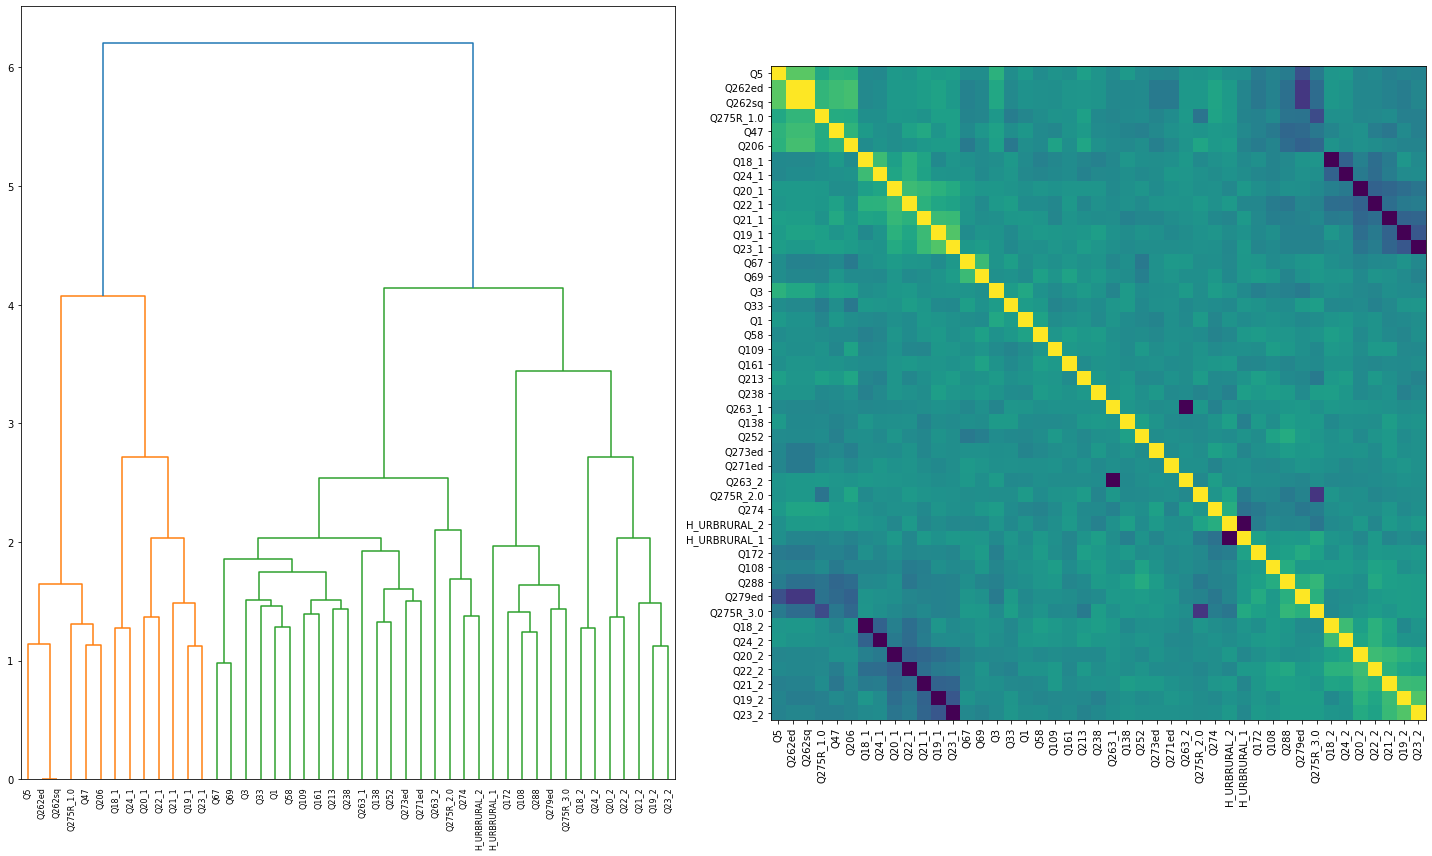

In [28]:
dual_plot(df_col_tmp)

## Corr matrix and heatmap

In [32]:
c = df_col_tmp["Q274"].corr(method='pearson')

TypeError: corr() missing 1 required positional argument: 'other'

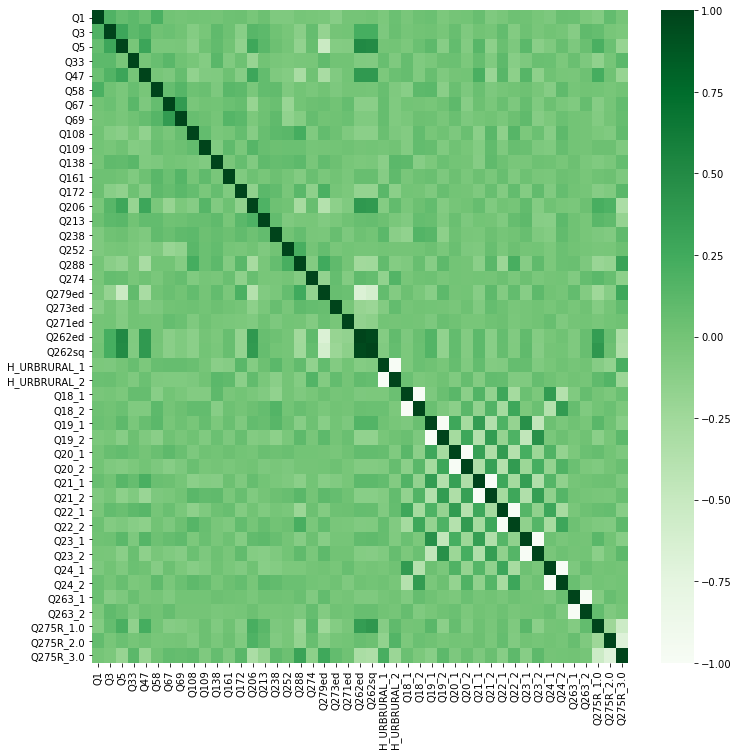

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(c, 
        xticklabels=c.columns,
        yticklabels=c.columns,cmap="Greens");

In [16]:
idx = np.argsort(df_col_tmp.corr()['Q274'])
df_col_tmp.corr()['Q274'][idx]

Q279ed         -0.164232
H_URBRURAL_1   -0.160339
Q172           -0.142834
Q275R_3.0      -0.138231
Q288           -0.080889
Q271ed         -0.078366
Q263_1         -0.076532
Q108           -0.063633
Q23_2          -0.036104
Q22_2          -0.035422
Q58            -0.031728
Q138           -0.030484
Q238           -0.026924
Q19_2          -0.026539
Q213           -0.022498
Q18_1          -0.021799
Q33            -0.018787
Q1             -0.016420
Q109           -0.015624
Q20_2          -0.006471
Q252           -0.004612
Q21_2          -0.001923
Q24_1          -0.000029
Q24_2           0.000029
Q21_1           0.001923
Q20_1           0.006471
Q47             0.020919
Q18_2           0.021799
Q19_1           0.026539
Q67             0.032356
Q22_1           0.035422
Q23_1           0.036104
Q161            0.047257
Q275R_2.0       0.055334
Q5              0.058913
Q206            0.060275
Q69             0.064912
Q3              0.072417
Q262sq          0.074490
Q273ed          0.075786


In [53]:
# !nvidia-smi

#### Lin regr with selected by Spearman corr with Q274 features

In [ ]:
Q279ed         -0.164232
H_URBRURAL_1   -0.160339
Q172           -0.142834
Q275R_3.0      -0.138231
Q288           -0.080889
Q3              0.072417
Q262sq          0.074490
Q273ed          0.075786
Q263_2          0.076532
Q262ed          0.097694
Q275R_1.0       0.121706
H_URBRURAL_2


In [26]:
df_selected = df_col_tmp[["Q274", "Q279ed","Q172","Q275R_3.0","Q275R_1.0","Q288","Q3","Q262sq","Q273ed","Q263_2","Q262ed","H_URBRURAL_1","H_URBRURAL_2"]]

In [27]:
X = df_selected.drop(columns=['Q274'])
y = df_selected['Q274']

In [28]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=False)

In [30]:
X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print ("In-Sample: %s" % r2_score(y_train, est2.predict(X2_train)))
print ("Out-of-Sample: %s" % r2_score(y_test, est2.predict(X2_test)))
print("\n")
print(est2.summary())
   

In-Sample: 0.0754792307063109
Out-of-Sample: 0.0724065753831431


                            OLS Regression Results                            
Dep. Variable:                   Q274   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.377
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           0.000165
Time:                        10:58:31   Log-Likelihood:                 253.52
No. Observations:                 467   AIC:                            -483.0
Df Residuals:                     455   BIC:                            -433.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
cols = list()
for i in range(177,196):
    cols.append('Q'+str(i))

In [7]:
df_col = df_r[cols]

In [8]:
df_col.head()

,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195
58183,10,6,1,7,6,1,1,8,5,8,1,1,1,1,1,1,9,5,1
58184,9,6,1,8,8,8,6,6,8,9,1,3,1,1,1,5,4,8,5
58185,9,7,6,7,3,8,7,5,3,9,4,3,8,4,7,3,9,7,6
58186,1,1,1,1,1,5,1,3,9,3,1,-1,1,5,1,2,6,1,1
58187,5,3,1,4,3,8,3,10,8,10,8,10,1,4,2,1,7,1,7


In [20]:
# with open("only_rus_q177_195.pck", "bw") as f:
#     pickle.dump(df_col, f)

In [9]:
# with open("only_rus_q177_195.pck", "br") as f:
#     df_col=pickle.load(f)


In [10]:
len(df_col.Q179)

1810

In [45]:
df_col.Q179.value_counts()

 1     1092
 2      191
 3      119
 5      111
 4       87
 6       68
 7       56
 8       30
-1       25
 10      17
 9       12
-2        2
Name: Q179, dtype: int64

In [11]:
df1 = pd.DataFrame()
for col in df_col.columns:
    df1[col] = df_col[col].replace(-1,np.nan)
    df1[col] = df_col[col].replace(-2,np.nan)
    df1[col] = df_col[col].replace(-4,np.nan)
    df1[col] = df_col[col].replace(-5,np.nan)

In [12]:
df1.isna().sum()

Q177    0
Q178    0
Q179    0
Q180    0
Q181    0
Q182    0
Q183    0
Q184    0
Q185    0
Q186    0
Q187    0
Q188    0
Q189    0
Q190    0
Q191    0
Q192    0
Q193    0
Q194    0
Q195    0
dtype: int64

In [13]:
df1.dropna(axis=1, inplace=True)

In [14]:
len(df1)

1810

In [15]:
df1 = df1/10

In [ ]:
df1.

In [16]:
from seaborn import distplot, pairplot

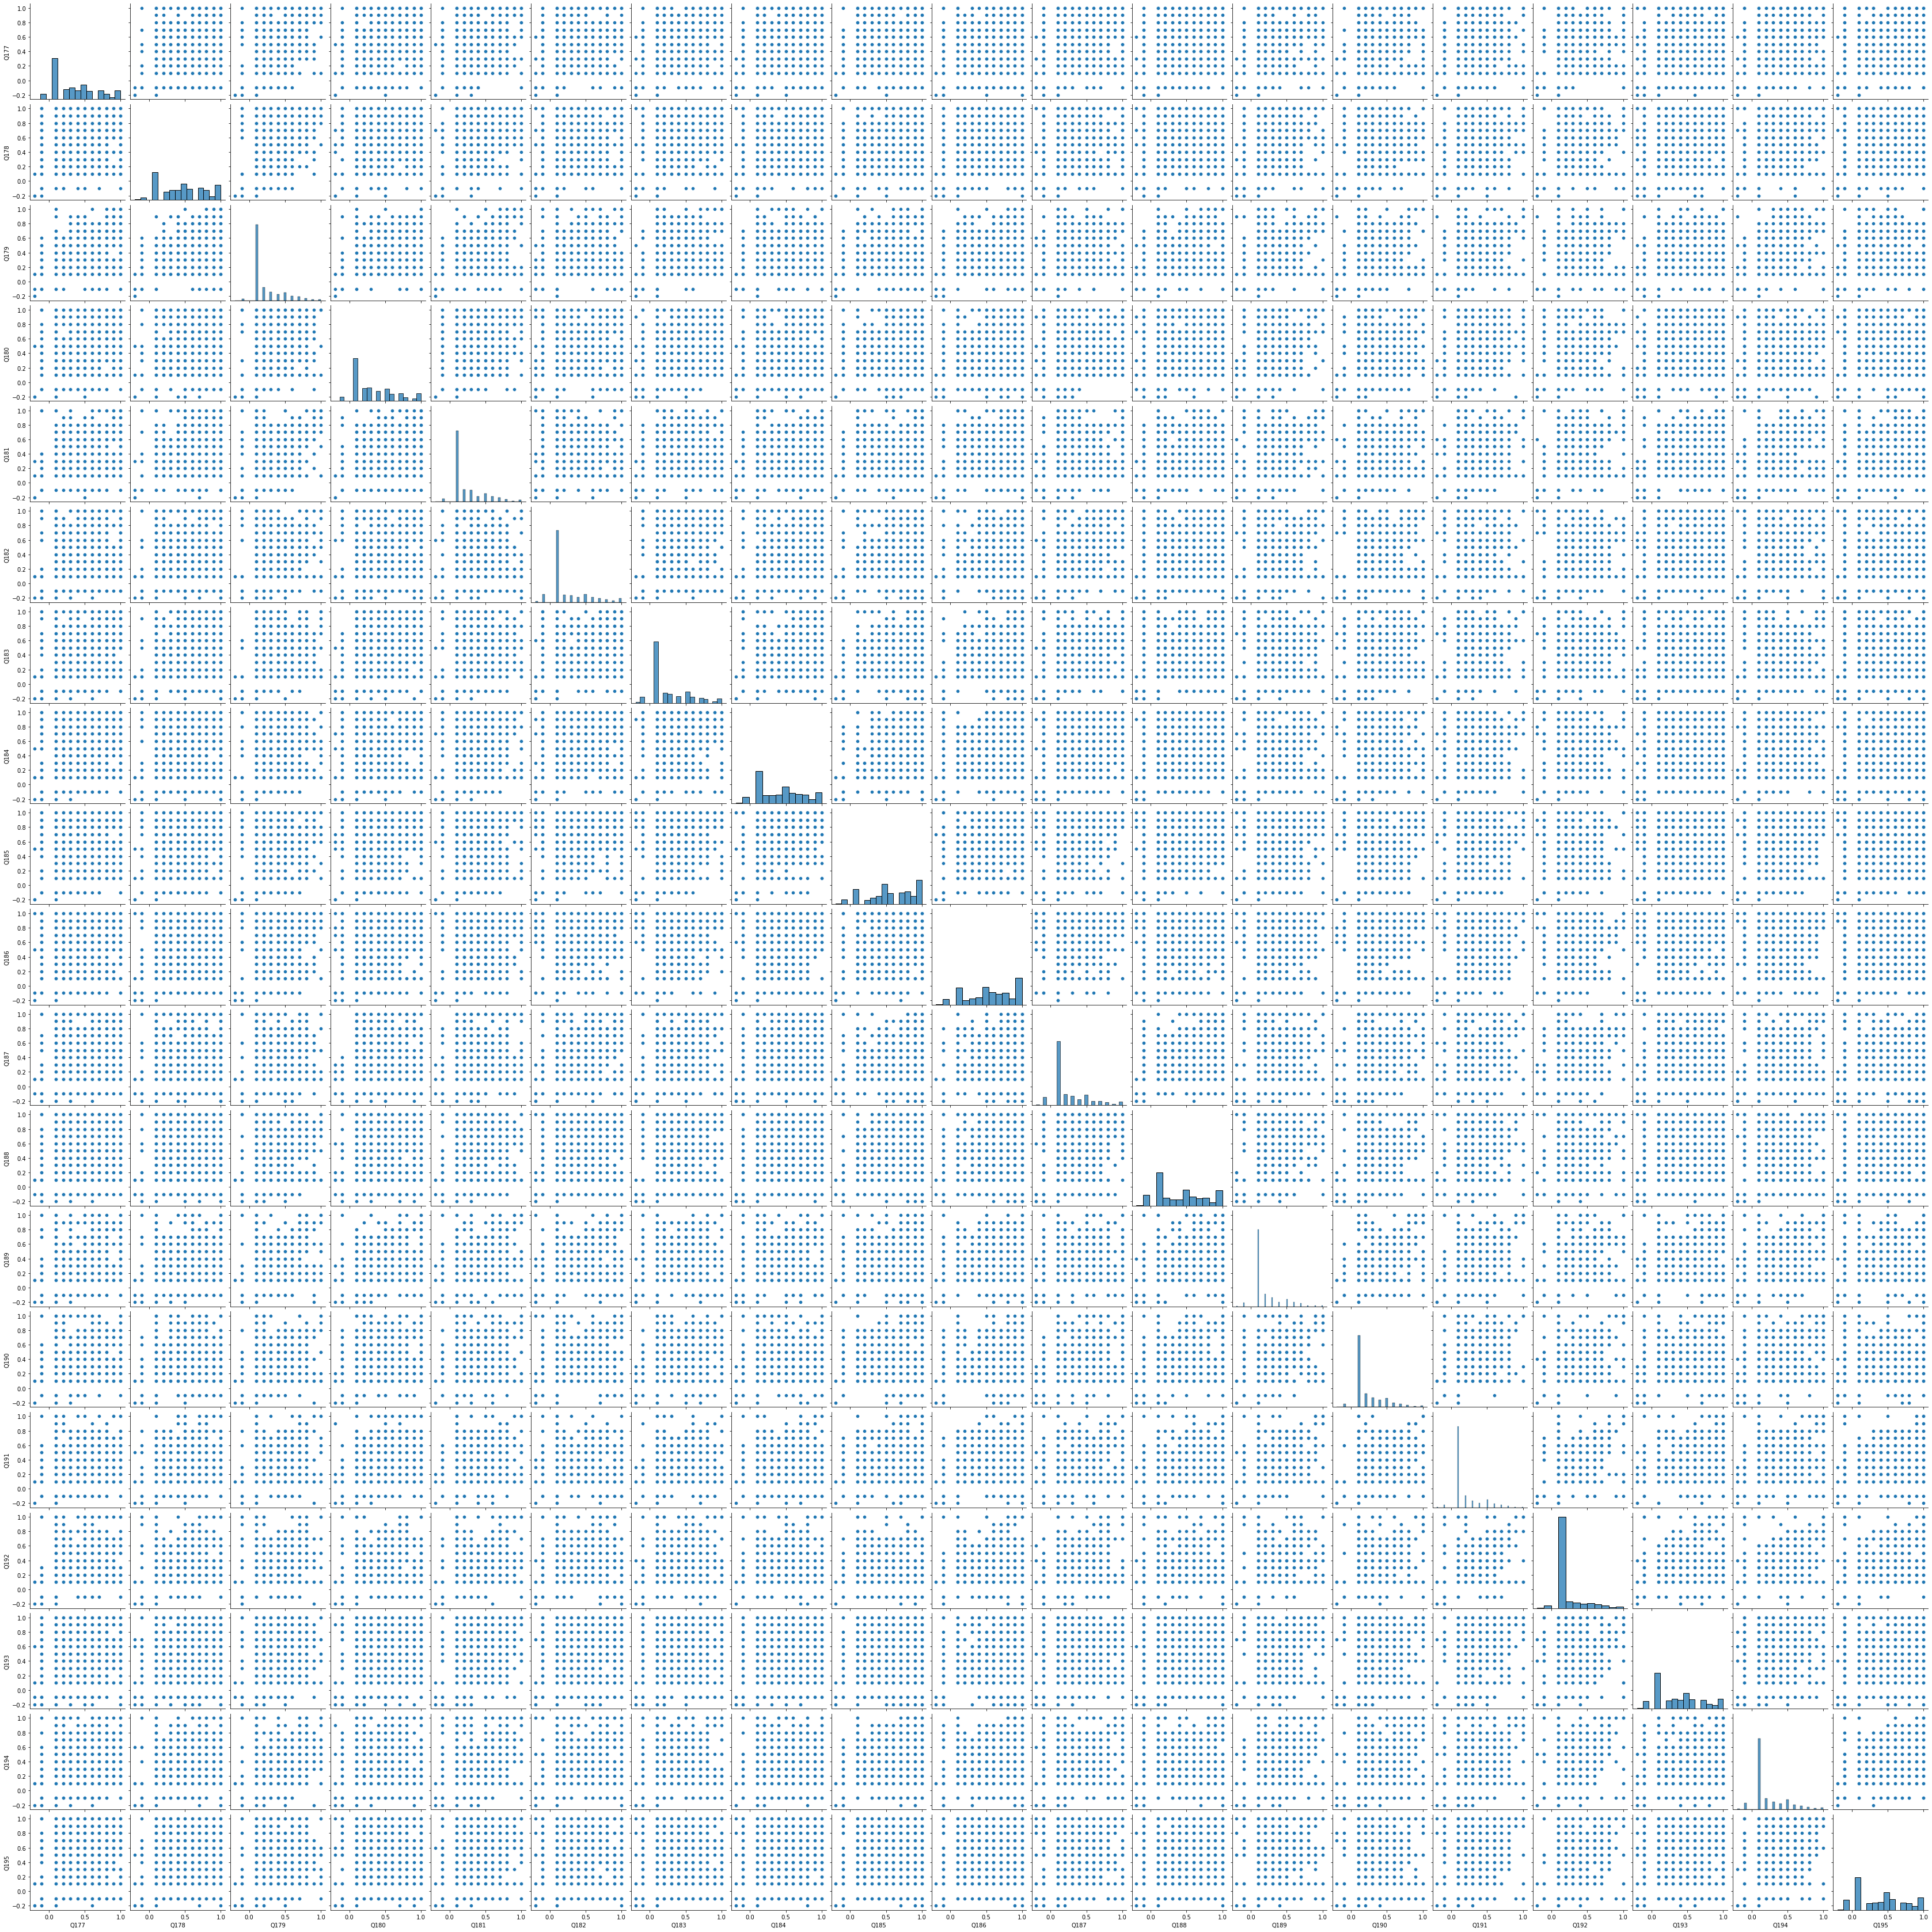

In [18]:
pairplot(df1)

## Corr matrix and heatmap

In [20]:
c = df1.corr(method='pearson')

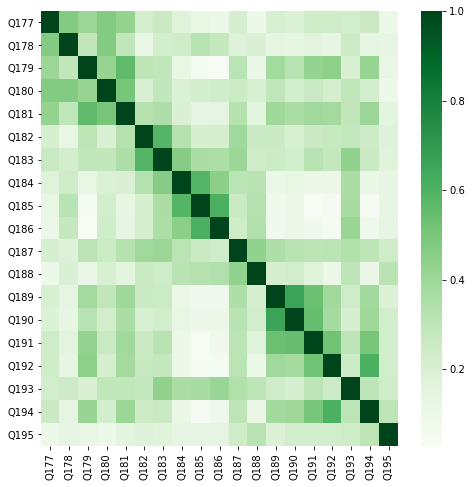

In [39]:
plt.figure(figsize=(8, 8))
sns.heatmap(c, 
        xticklabels=c.columns,
        yticklabels=c.columns,cmap="Greens");

## Define features and target

In [27]:
X = df1.drop(columns=['Q186'])
y = df1['Q186']

## Split to train and test

In [46]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y,
        test_size = 0.30,
        random_state=42,
        shuffle=True)

## Linear Regression

In [59]:

X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print ("In-Sample: %s" % r2_score(y_train, est2.predict(X2_train)))
print ("Out-of-Sample: %s" % r2_score(y_test, est2.predict(X2_test)))
print("\n")
print(est2.summary())
   

In-Sample: 0.4639233878961714
Out-of-Sample: 0.39800918818131903


                            OLS Regression Results                            
Dep. Variable:                   Q186   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     60.00
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          1.43e-154
Time:                        20:55:21   Log-Likelihood:                -2.0847
No. Observations:                1267   AIC:                             42.17
Df Residuals:                    1248   BIC:                             139.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

## XGBoost fit

In [65]:
eval_set = [(X_train, y_train), (X_test, y_test)] #error logs container during training
bst = xgb.XGBRegressor(objective ='reg:squarederror',
                       max_depth=5,
                       n_estimators=200,
                       eta = 0.03,
                       tree_method='gpu_hist', 
                       gpu_id=3)
bst.fit(X_train, y_train, eval_set=eval_set, eval_metric= "rmse", verbose=False)
print ("Out-of-Sample: %s" % metrics.r2_score(y_test, bst.predict(X_test)))
print ("In-Sample: %s" % metrics.r2_score(y_train, bst.predict(X_train)))

Out-of-Sample: 0.42521997934419287
In-Sample: 0.7542824481713652


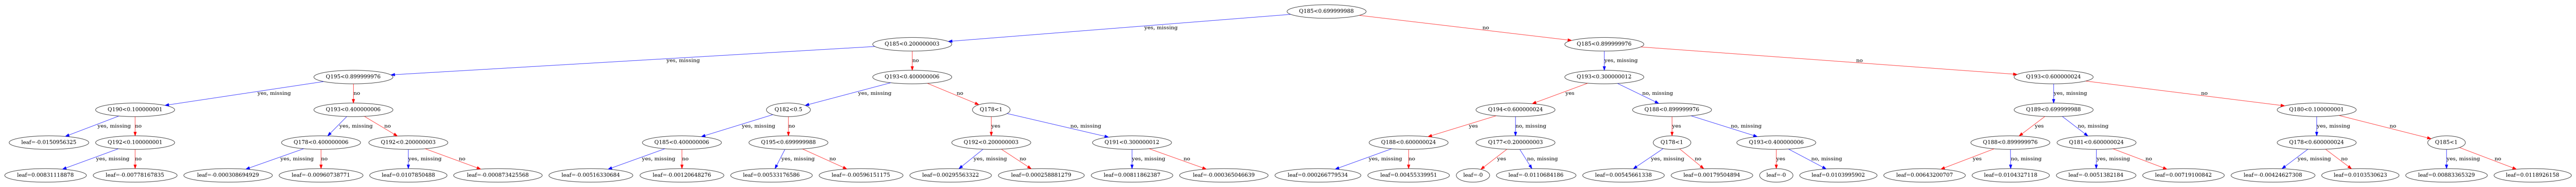

In [73]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(bst, num_trees=4, ax=ax)
plt.show()

## Clustering

In [75]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [76]:
kmeans = KMeans(
   init="random",
   n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42)

In [77]:
kmeans.fit(df1)

KMeans(init='random', n_clusters=3, random_state=42)

In [79]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)
    

1890.8881093319212
[[0.38604294 0.57990798 0.18788344 0.38650307 0.21457055 0.27760736
  0.35444785 0.63404908 0.81579755 0.83021472 0.28650307 0.57684049
  0.16656442 0.19202454 0.15966258 0.14079755 0.51978528 0.17453988
  0.46196319]
 [0.25931198 0.34080664 0.14792408 0.2202847  0.13570581 0.1227758
  0.13262159 0.23131673 0.38944247 0.36737841 0.12597865 0.23795967
  0.13701068 0.16405694 0.13487544 0.12087782 0.20059312 0.14792408
  0.29857651]
 [0.60571429 0.63396825 0.49238095 0.60031746 0.53301587 0.44539683
  0.48571429 0.52063492 0.6152381  0.60412698 0.47460317 0.54888889
  0.44666667 0.45428571 0.45460317 0.42603175 0.58984127 0.52095238
  0.58666667]]
14


In [80]:
kmeans.labels_[:5]

array([0, 2, 2, 1, 0], dtype=int32)

In [81]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

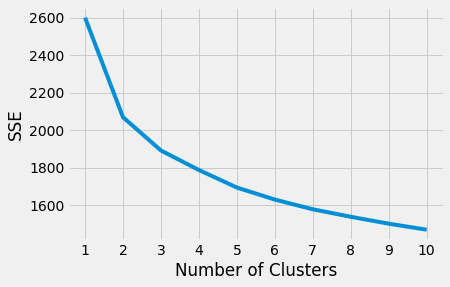

In [82]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
    

In [84]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    silhouette_coefficients.append(score)

In [85]:
silhouette_coefficients

[0.1945702102830094,
 0.16834950247337035,
 0.14325664352302447,
 0.1086179480444063,
 0.1099821347529134,
 0.1025920590724159,
 0.09663781727731274,
 0.09501768442226206,
 0.0947702315820079]

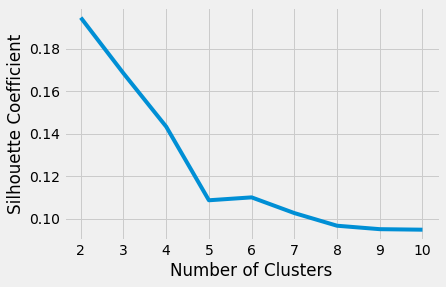

In [86]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [37]:
df_r_test = df_r[(df_r.Q1.isin([1,2,3,4])) & (df_r.Q2.isin([1,2,3,4]))][['Q1','Q2']]

In [39]:
len(df_r_test)

1794

In [40]:
n = np.sum(df_r_test)

In [41]:
n

Q1    2128
Q2    3138
dtype: int64

In [43]:
import scipy.stats as stats
X2 = stats.chi2_contingency(df_r_test, correction=False)[0]

In [44]:
X2

284.3553901498374

In [45]:
n = np.sum(df_r_test)
minDim = min(df_r_test.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

Q1    0.365548
Q2    0.301026
dtype: float64


In [46]:
df_r_test.groupby().count() 

TypeError: You have to supply one of 'by' and 'level'

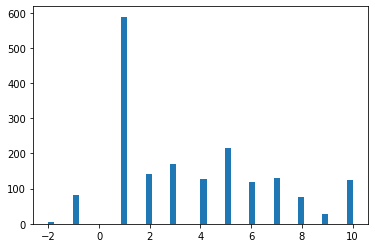

In [49]:
plt.hist(df_r.Q177, bins = 50);


In [50]:
df_r.Q177.mean()

3.652486187845304

In [51]:
df_r.Q177.std()

3.0030769012134573

In [52]:
len(df_r.Q177)

1810

In [5]:
df_r.replace(-5,np.nan,inplace=True)
df_r.replace(-4,np.nan,inplace=True)
df_r.replace(-2,np.nan,inplace=True)
df_r.replace(-1,np.nan,inplace=True)


# -1-.- Don´t know
# -2-.- No answer
# -4-.- Not asked
# -5-.- Missing; Not available

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [6]:
df_r.dropna(axis=0,inplace=True)

<ipython-input-6-cc2e0039c56f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r.dropna(axis=0,inplace=True)


,version,doi,A_WAVE,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,A_YEAR,D_INTERVIEW,J_INTDATE,FW_END,FW_START,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,S025,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_EU,Q82_APEC,Q82_ARABLEAGUE,Q82_ASEAN,Q82_AFRICANUNION,Q82_CIS,Q82_ECO,Q82_GULFCOOP,Q82_ISLCOOP,Q82_MERCOSUR,Q82_NAFTA,Q82_OAS,Q82_SAARC,Q82_SCO,Q82_TLC,Q82_UNDP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R2,x003r,Q263,Q264,Q265,Q266,Q267,Q268,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275A,Q275R,Q276,Q276A,Q276R,Q277,Q277A,Q277R,Q278,Q278A,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Y001,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,RESEMAVALWGT,fhregion,polregfh,freestfh,prfhrat,prfhscore,clfhrat,clfhscore,democ,autoc,polity,durable,regtype,ruleoflaw,corrupttransp,electintegr,btiregion,btistatus,btidemstatus,btistate,btipolpart,btiruleoflaw,btistability,btiintegration,btimarket,btigovindex,btigoveperform,btiregime,regionWB,incomeWB,landWB,GDPpercap1,GDPpercap2,giniWB,incrichest10p,popWB1990,popWB2000,popWB2019,lifeexpect,popgrowth,urbanpop,laborforce,deathrate,unemployfem,unemploymale,unemploytotal,accessclfuel,accesselectr,renewelectr,co2emis,co2percap,easeofbusiness,militaryexp,Trade,healthexp,educationexp,medageun,meanschooling,educationHDI,compulseduc,GII,DGI,womenparl,hdi,incomeindexHDI,humanineqiality,lifeexpectHDI,homiciderate,Refugeesorigin,internetusers,mobphone,migrationrate,schoolgpi,femchoutsch,choutsch,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2xel_frefair,v2xcl_rol,v2x_cspart,v2xeg_eqdr,v2excrptps,v2exthftps,v2juaccnt,v2cltrnslw,v2clacjust,v2clsocgrp,v2clacfree,v2clrelig,v2csrlgrep,v2mecenefm,v2mecenefi,v2mebias,v2pepwrses,v2pepwrgen,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2clgencl,v2peasjgen,v2peasbgen,v2cafres,v2cafexch,v2x_corr,v2x_gender,v2x_gencl,v2x_genpp,v2x_rule,v2xcl_acjst,ID_GPS,ID_PartyFacts,Partyname,Partyabb,CPARTY,CPARTYABB,Type_Values,Type_Populism,Type_Populist_Values,Type_Partysize_vote,Type_Partysize_seat,GPS_V4_Scale,GPS_V6_Scale,GPS_V8_Scale,GPS_V9,GPS_V10,GPS_V11,GPS_V12,GPS_V13,GPS_V14,GPS_V15,GPS_V16,GPS_V17,WVS_LR_PartyVoter,WVS_LibCon_PartyVoter,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psp